In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,genero,edad,ingreso_anual,puntuacion_gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        200 non-null    int64 
 1   genero            200 non-null    object
 2   edad              200 non-null    int64 
 3   ingreso_anual     200 non-null    int64 
 4   puntuacion_gasto  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [87]:
df.describe()

,CustomerID,edad,ingreso_anual,puntuacion_gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [88]:
df.isnull().sum()

CustomerID          0
genero              0
edad                0
ingreso_anual       0
puntuacion_gasto    0
dtype: int64

### Grafica basada en la edad y la puntuacion de gasto

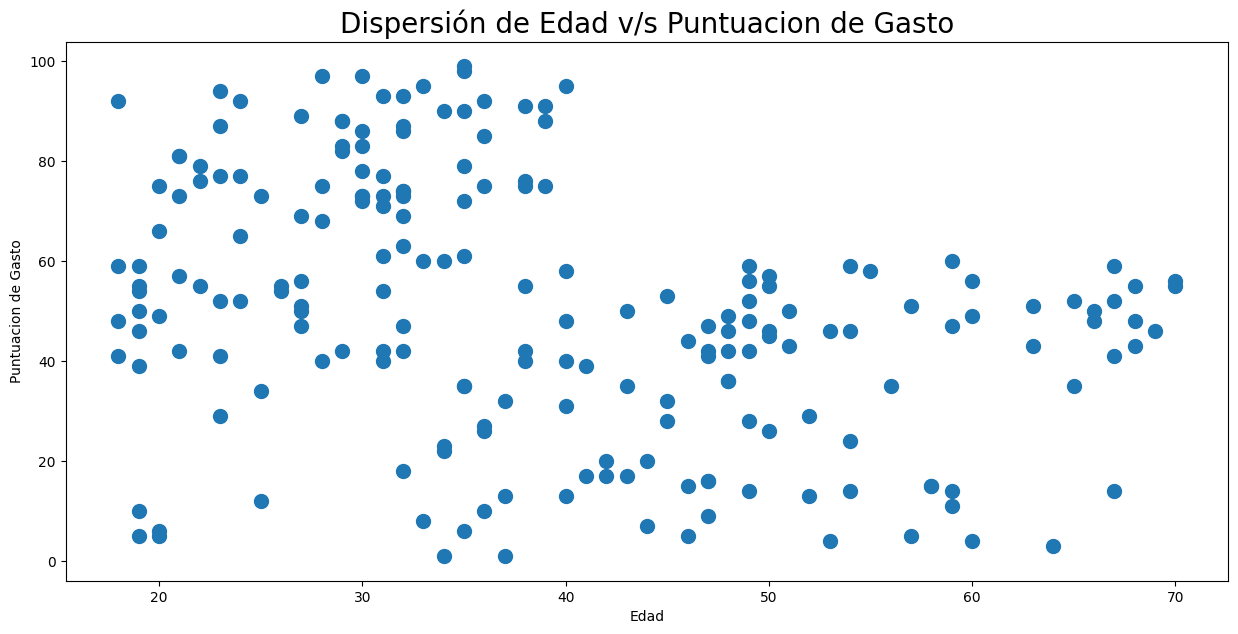

In [89]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Dispersión de Edad v/s Puntuacion de Gasto', fontsize = 20)
plt.xlabel('Edad')
plt.ylabel('Puntuacion de Gasto')
plt.scatter( x = 'edad', y = 'puntuacion_gasto', data = df, s = 100)
plt.show()

### Identificacion de valor optimo de K

In [90]:
x1 = df[['edad' , 'puntuacion_gasto']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

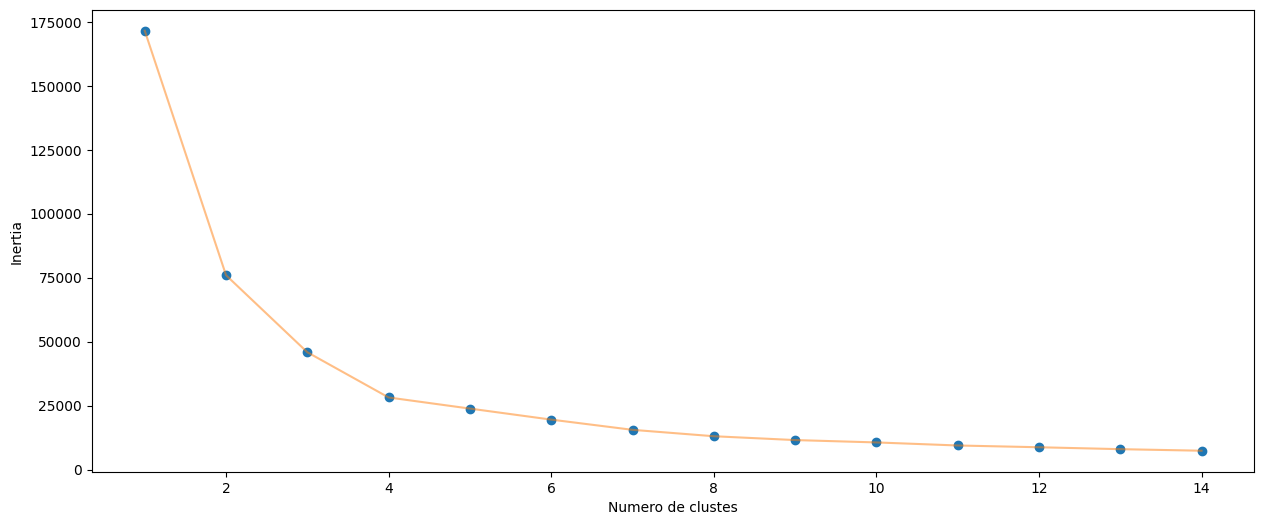

In [91]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero de clustes') , plt.ylabel('Inertia')
plt.show()

### Aplicamos KMeans para un valor de K=4

In [139]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

In [135]:
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
pred = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

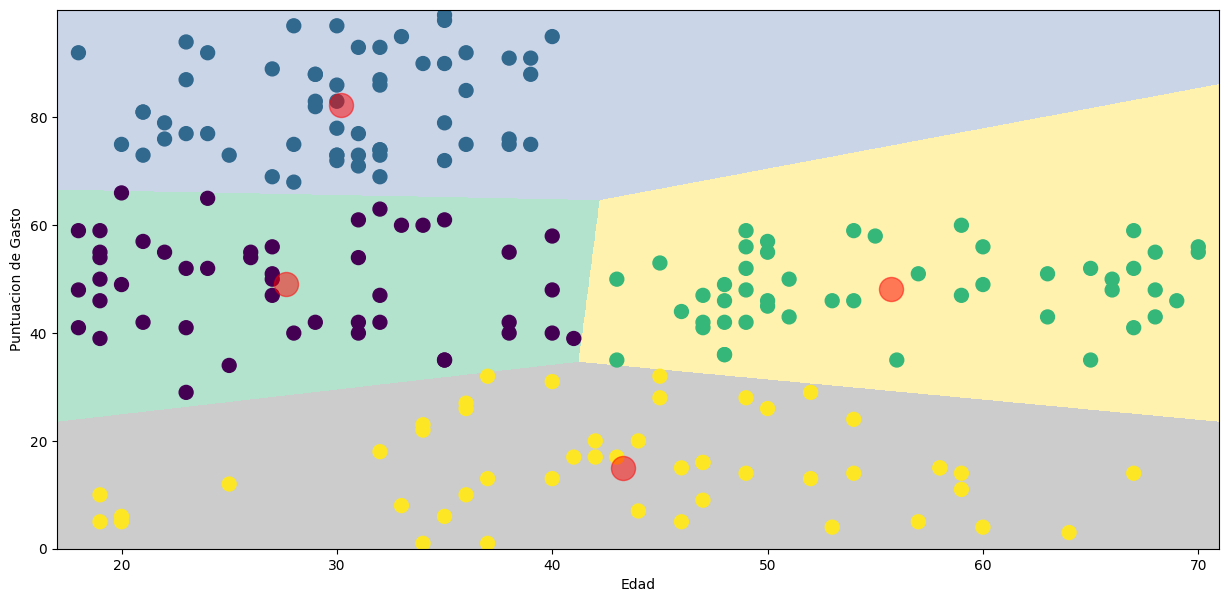

In [152]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
pred = pred.reshape(xx.shape)
plt.imshow(pred , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'edad', y = 'puntuacion_gasto', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Puntuacion de Gasto') , plt.xlabel('Edad')
plt.show()


### Grafica basada en Ingresos Anuales y la Puntuacion de Gasto

In [98]:

x2 = df[['ingreso_anual' , 'puntuacion_gasto']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(x2)
    inertia.append(algorithm.inertia_)

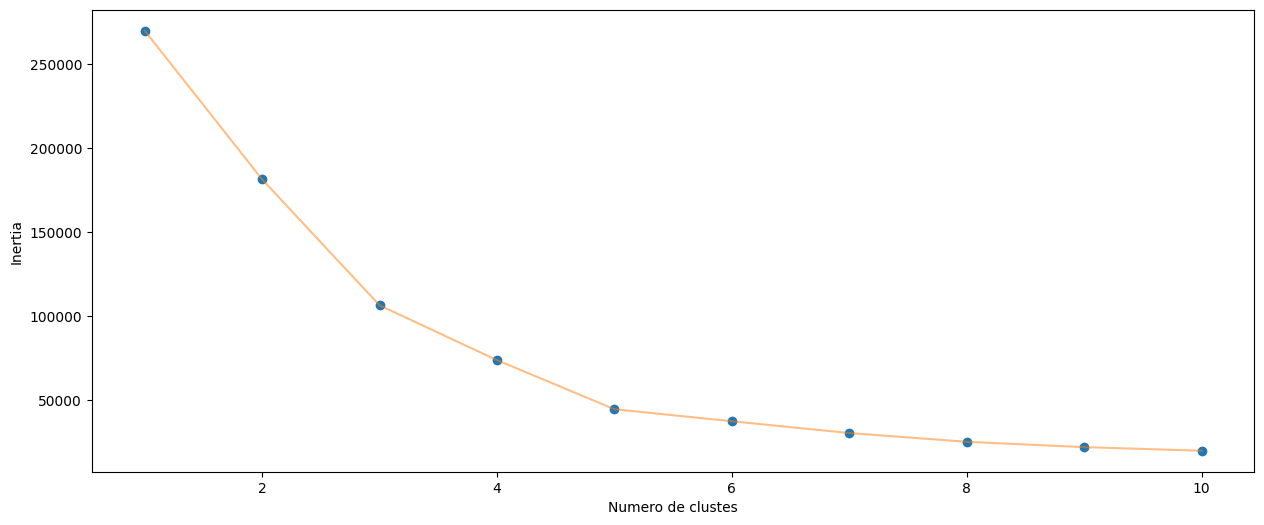

In [99]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero de clustes') , plt.ylabel('Inertia')
plt.show()

In [113]:

algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_


In [114]:
h = 0.02
x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

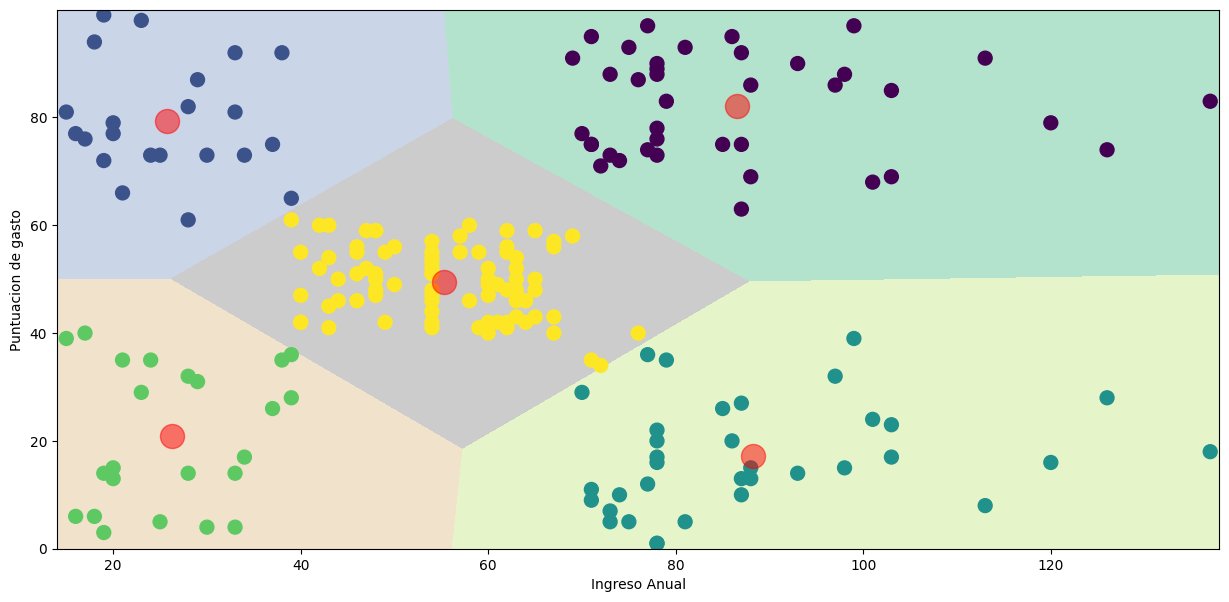

In [115]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'ingreso_anual' ,y = 'puntuacion_gasto' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Puntuacion de gasto') , plt.xlabel('Ingreso Anual')
plt.show()

### Grafica basada en Edad, Ingresos Anuales y la Puntuacion de Gasto

In [105]:
X3 = df[['edad' , 'ingreso_anual' ,'puntuacion_gasto']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

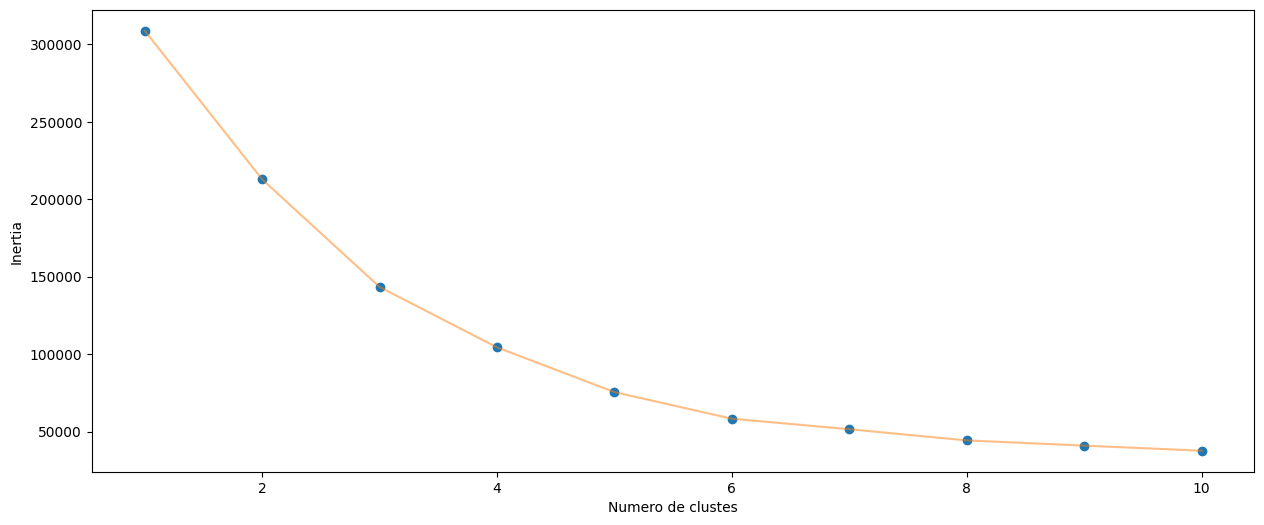

In [106]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero de clustes') , plt.ylabel('Inertia')
plt.show()

In [109]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df

,CustomerID,genero,edad,ingreso_anual,puntuacion_gasto,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [108]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['edad'],
    y= df['puntuacion_gasto'],
    z= df['ingreso_anual'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Edad, Ingresos Anuales y la Puntuacion de Gasto',
    scene = dict(
            xaxis = dict(title  = 'Edad'),
            yaxis = dict(title  = 'Puntuacion de Gasto'),
            zaxis = dict(title  = 'Ingreso Anual')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)